# NATS3100: Practical 5 (Logistic regression and decision trees, weeks 6 and 7)


### Brexit

On June 23rd, 2016, The UK had a national referendum to decide whether the country should leave the
EU (‘Brexit’). The result, a win for the Leave campaign, surprised many political commentators, who had
expected that people would vote to Remain. Immediately people began to look for patterns that coud explain
the Leave vote: cities had generally voted to Remain, while small towns had voted to Leave. England and
Wales voted to Leave, while Northern Ireland and especially Scotland voted to Remain.

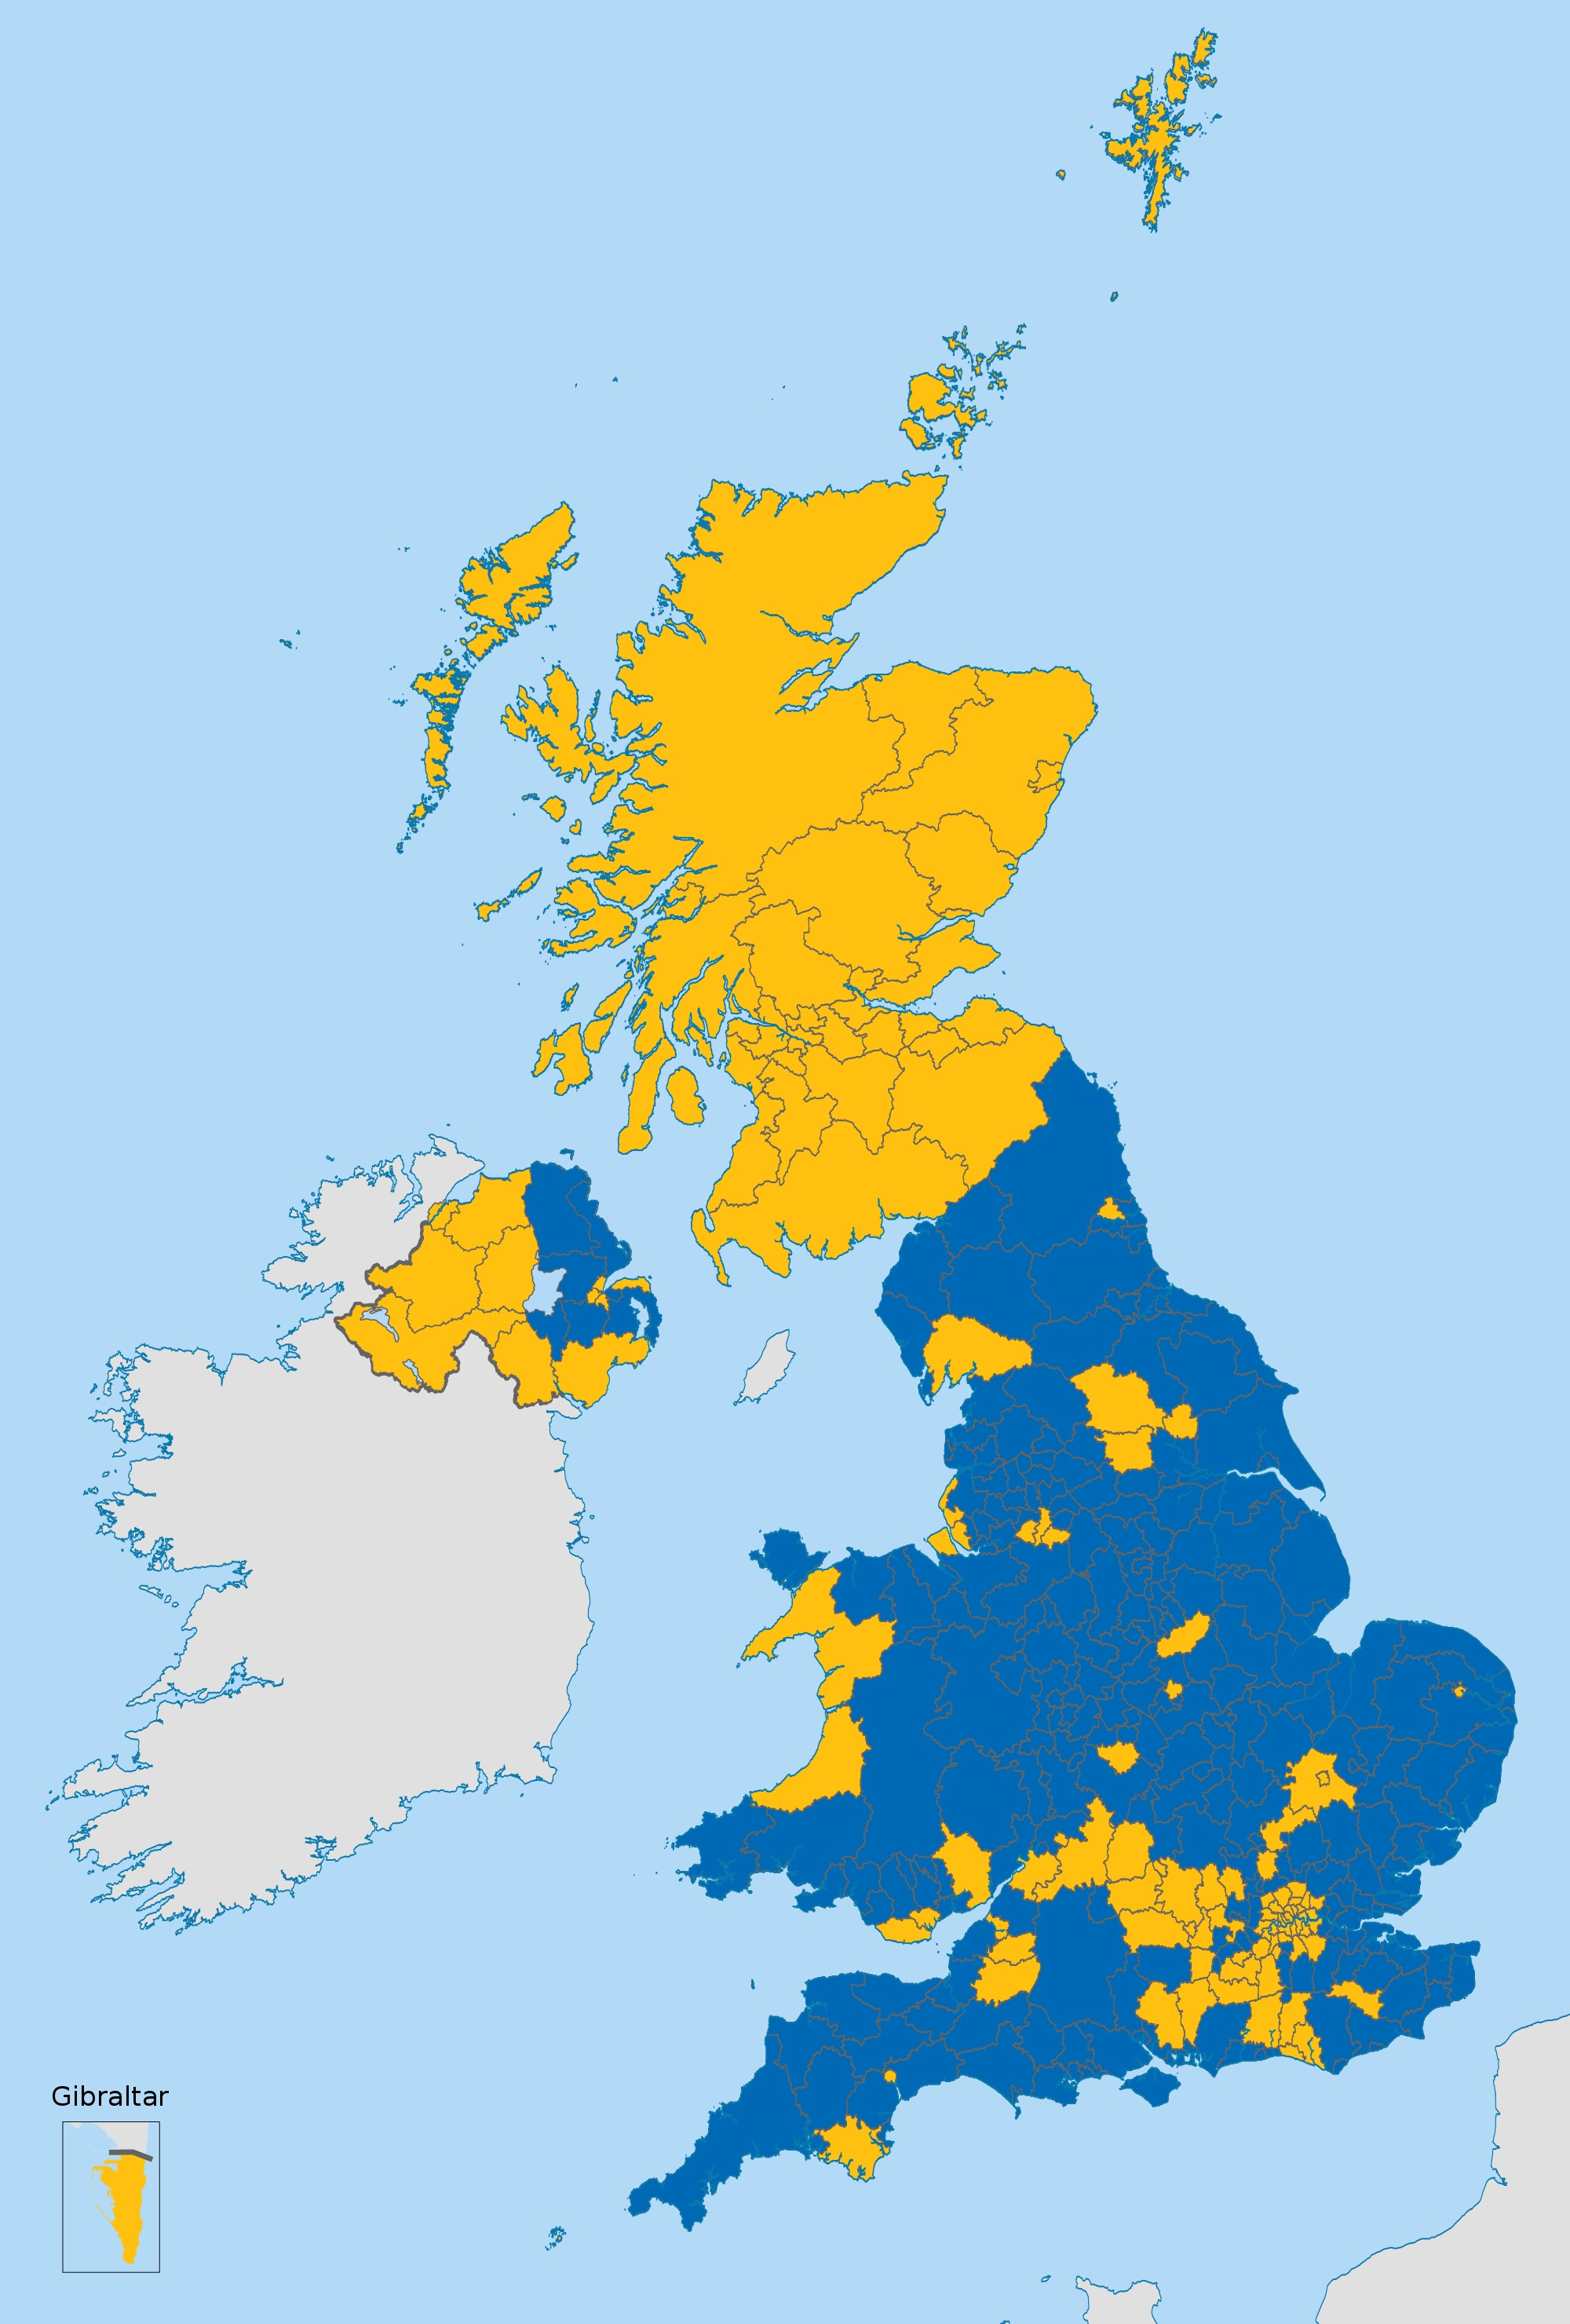
Figure 1: EU referendum vote by electoral ward. Yellow indicates Remain, blue indicates Leave

In the next few days, the Guardian newspaper presented some apparent demographic trends in the vote, based
on the ages, incomes, education and class of different electoral wards (https://www.theguardian.com/politics/
ng-interactive/2016/jun/23/eu-referendum-live-results-and-analysis). The Guardian’s analysis stopped at
showing these results graphically, and commenting on the apparent patterns. We will go one better by doing
some real statistical analysis of the data.

I have scraped the data from the Guardian’s plots into a data file (brexit.csv) which you can download from
MINERVA

There are 6 attributes in the data. The 5 possible input variables are:

* abc1: proportion of individuals who are in the ABC1 social classes (middle to upper class)
* medianIncome: the median income of all residents
* medianAge: median age of residents
* withHigherEd: proportion of residents with any university-level education
* notBornUK: the proportion of residents who were born outside the UK

These are normalised so that the lowest value is zero and the highest value is one.
The output variable is called voteBrexit, and gives a TRUE/FALSE answer to the question ‘did this electoral
ward vote for Brexit?’ (i.e. did more than 50% of people vote to Leave?).



## Tasks (week 6):

### 1. Fit a logistic regression models using all of the available inputs. Identify the direction of each effect from the fitted coefficients. Compare these with the plots shown on the Guardian website. Do they agree? Explain. (1.5 mark)

In [126]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import glm
import statsmodels.api as sm


df = pd.read_csv('./brexit.csv')
## Converting True/False to 1/0 for GLM
df['voteBrexit'] = [1 if i == True else 0 for i in df['voteBrexit']]
print(df.head())
model = 'voteBrexit ~ abc1 + notBornUK + medianIncome + medianAge + withHigherEd'
full_fit = glm(model, df, family = sm.families.Binomial()).fit()
full_fit.summary()


       abc1  notBornUK  medianIncome  medianAge  withHigherEd  voteBrexit
0  0.133641   0.012605      0.252577   0.500000      0.085526           1
1  0.129032   0.113445      0.108247   0.272727      0.111842           1
2  0.161290   0.004202      0.128866   0.636364      0.118421           1
3  0.322581   0.046218      0.226804   0.454545      0.217105           1
4  0.345622   0.058824      0.201031   0.545455      0.243421           1


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             voteBrexit   No. Observations:                  344
Model:                            GLM   Df Residuals:                      338
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -123.69
Date:                Fri, 24 Mar 2023   Deviance:                       247.39
Time:                        14:45:24   Pearson chi2:                     401.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4059
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.1386      0.848     -0.164      0.870      -1.800       1.523
abc1            17.5780      2.911      6.038      0.000      11.872      23.284
notBornUK        5.6861      1.803      3.153      0.002       2.152       9.221
medianIncome    -6.3857      1.922     -3.323      0.001     -10.152      -2.619
medianAge        5.9209      1.407      4.209      0.000       3.164       8.678
withHigherEd   -26.7443      3.576     -7.478      0.000     -33.753     -19.735
================================================================================
"""

### Graphs from Guardian

![brexit.png](./brexit.png)

### 2. Present the value of each coefficient estimate and calculate the 95% confidence interval. Which input would you say has the strongest effect and why? (0.5 mark) 

The coefficients from the logistic regression do seem to generally agree with the graphs printed in the Guardian, which are shown above. A negative coefficient implies that a higher value results in a vote closer to 0, which in this case is to remain, and a positive coefficient means that a higher value results in leave.


A strong negative coefficient, with a comparatively small 95% confidence interval, can be seen the % population with higher education, for example. This also agrees with the graph in the Guardian, where higher percentages voted remain and lower voted leave.
The same is true for the median income column, however the coefficient is not as large, and the 95% interval is wider, which is also seen in the graph in the form of a more spread distribution or a higher variance.


The other coefficients are harder to compare to the graphs.


Interestingly, ABC1 has a similair shape to the higher education and median income data in the graphs, so I would expect a negative coefficient as well, however the opposite is true and the coefficient is large in the positive direction. I think this can be explained due to the logistic nature of our analysis. Since the value of voteBrexit is either True or False, it does not give a measure of the percentage of people that voted for Remain or Leave. This is especially highlighted in the % of residents not born in the UK, as we can see in the graph a large majority of electoral wards with over 30% of residents not born in the UK, voted to leave, yet we still get a positive coefficient, due to the density of data on the leave side.


The median age of residents graph is what I would expect a positive coefficient to look like.

### 3. Using aic, perform a model selection to determine which factors are useful to predict the result of the vote.

Using greedy input selection, picking the input that minimises the AIC, fixing it, and repeating.

In [127]:
formulas = [
    'abc1',
    'notBornUK',
    'medianIncome',
    'medianAge',
    'withHigherEd'
]


for formula in formulas:
    current_model = glm(f'voteBrexit ~ {formula}', df, family = sm.families.Binomial()).fit()
    print(f'{formula} = {current_model.aic}')

abc1 = 377.543729722669
notBornUK = 377.80127885092975
medianIncome = 368.44370373062986
medianAge = 401.2766935753845
withHigherEd = 313.5604055904664


In [128]:

formulas = [
    'abc1',
    'notBornUK',
    'medianIncome',
    'medianAge'
]


for formula in formulas:
    current_model = glm(f'voteBrexit ~ withHigherEd + {formula}', df, family = sm.families.Binomial()).fit()
    print(f'withHigherEd + {formula} = {current_model.aic}')

withHigherEd + abc1 = 286.5454477003765
withHigherEd + notBornUK = 310.3643998928851
withHigherEd + medianIncome = 315.5255949327895
withHigherEd + medianAge = 303.3090827944477


In [129]:

formulas = [
    'notBornUK',
    'medianIncome',
    'medianAge'
]


for formula in formulas:
    current_model = glm(f'voteBrexit ~ withHigherEd + abc1 + {formula}', df, family = sm.families.Binomial()).fit()
    print(f'withHigherEd + abc1 + {formula} = {current_model.aic}')

withHigherEd + abc1 + notBornUK = 285.2443784426674
withHigherEd + abc1 + medianIncome = 275.93391871432317
withHigherEd + abc1 + medianAge = 271.9317045094926


At this point, the differences in the AIC are becoming trivial, the largest reduction is from the input withHigherEd, followed by abc1.

In [130]:
formulas = [
    'notBornUK',
    'medianIncome'
]


for formula in formulas:
    current_model = glm(f'voteBrexit ~ withHigherEd + abc1 + medianAge + {formula}', df, family = sm.families.Binomial()).fit()
    print(f'withHigherEd + abc1 + medianAge + {formula} = {current_model.aic}')

withHigherEd + abc1 + medianAge + notBornUK = 269.1141085930414
withHigherEd + abc1 + medianAge + medianIncome = 266.9488469481073


In [131]:
final_model = glm('voteBrexit ~ withHigherEd + abc1 + medianAge + notBornUK + medianIncome', df, family = sm.families.Binomial()).fit()
print(f'withHigherEd + abc1 + medianAge + notBornUK + medianIncome = {final_model.aic}')

withHigherEd + abc1 + medianAge + notBornUK + medianIncome = 259.38510672072397


However, even with the paramater penalty from the AIC, it is still minimised by the model with all inputs.

## Tasks (week 7):

### 4. Use the Scikit-Learn package to create a decision tree classification model. Visualise your model and intepret the fitted model. (1 mark)

Note: dtreeviz package required for my visualizations

In [132]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
variables = [
    'abc1',
    'notBornUK',
    'medianIncome',
    'medianAge',
    'withHigherEd'
]
brexit_tree = DecisionTreeClassifier(criterion= 'gini')
target = 'voteBrexit'
brexit_tree.fit(df[variables].values, df['voteBrexit'])


DecisionTreeClassifier()

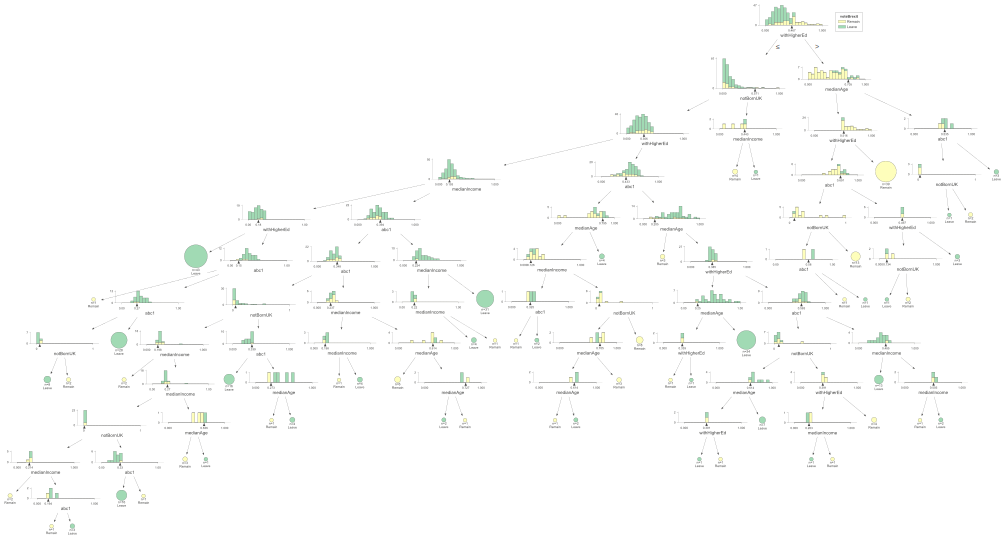

In [133]:
import dtreeviz
viz_model = dtreeviz.model(brexit_tree,
                           X_train=df[variables], y_train=df[target],
                           feature_names=variables,
                           target_name=target, class_names=["Remain", "Leave"])

viz_model.view(scale=0.5)

Presented above is the decision tree without a max depth, so there is no impurity in any of the final groups. As expected, given the large amount of coefficients, with sometimes small values, there are many many splits with some pathways ending in sample sizes of n = 1 or 2. This is not very easy to interpret. However there are still some takeaways from this model. We can follow the path of a single electoral ward to see the importance of the different inputs.

abc1            0.580645
notBornUK       0.079832
medianIncome    0.329897
medianAge       0.636364
withHigherEd    0.407895
voteBrexit      1.000000
Name: 101, dtype: float64


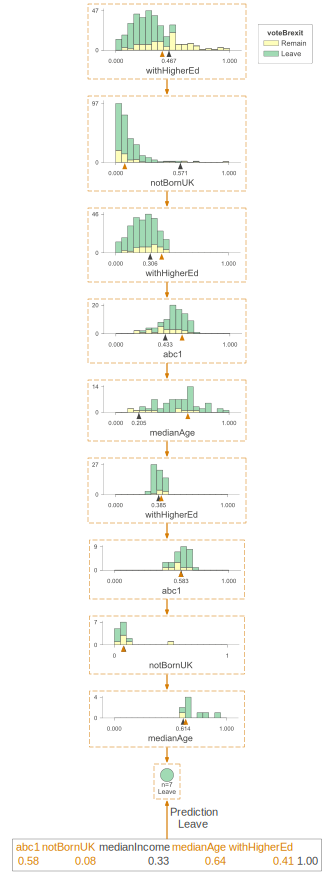

In [134]:
## Pick a random sample and follow path through the tree
x = df.iloc[np.random.randint(0,len(df['voteBrexit'])-1)] ## Re-run for a different sample
print(x)
viz_model.view(x=x, show_just_path=True)


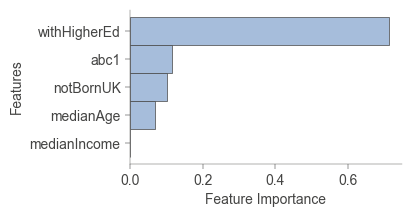

In [135]:
viz_model.instance_feature_importance(x, figsize=(3.5,2))

We can see that the most important input is reliably withHigherEd. It is the first split in the decision tree, and in majority of pathways it is often used a second or 3rd time to split the tree. This agrees with our logistic model, where withHigherEd is the single input which minimises the AIC and has the highest magnitude coefficient.

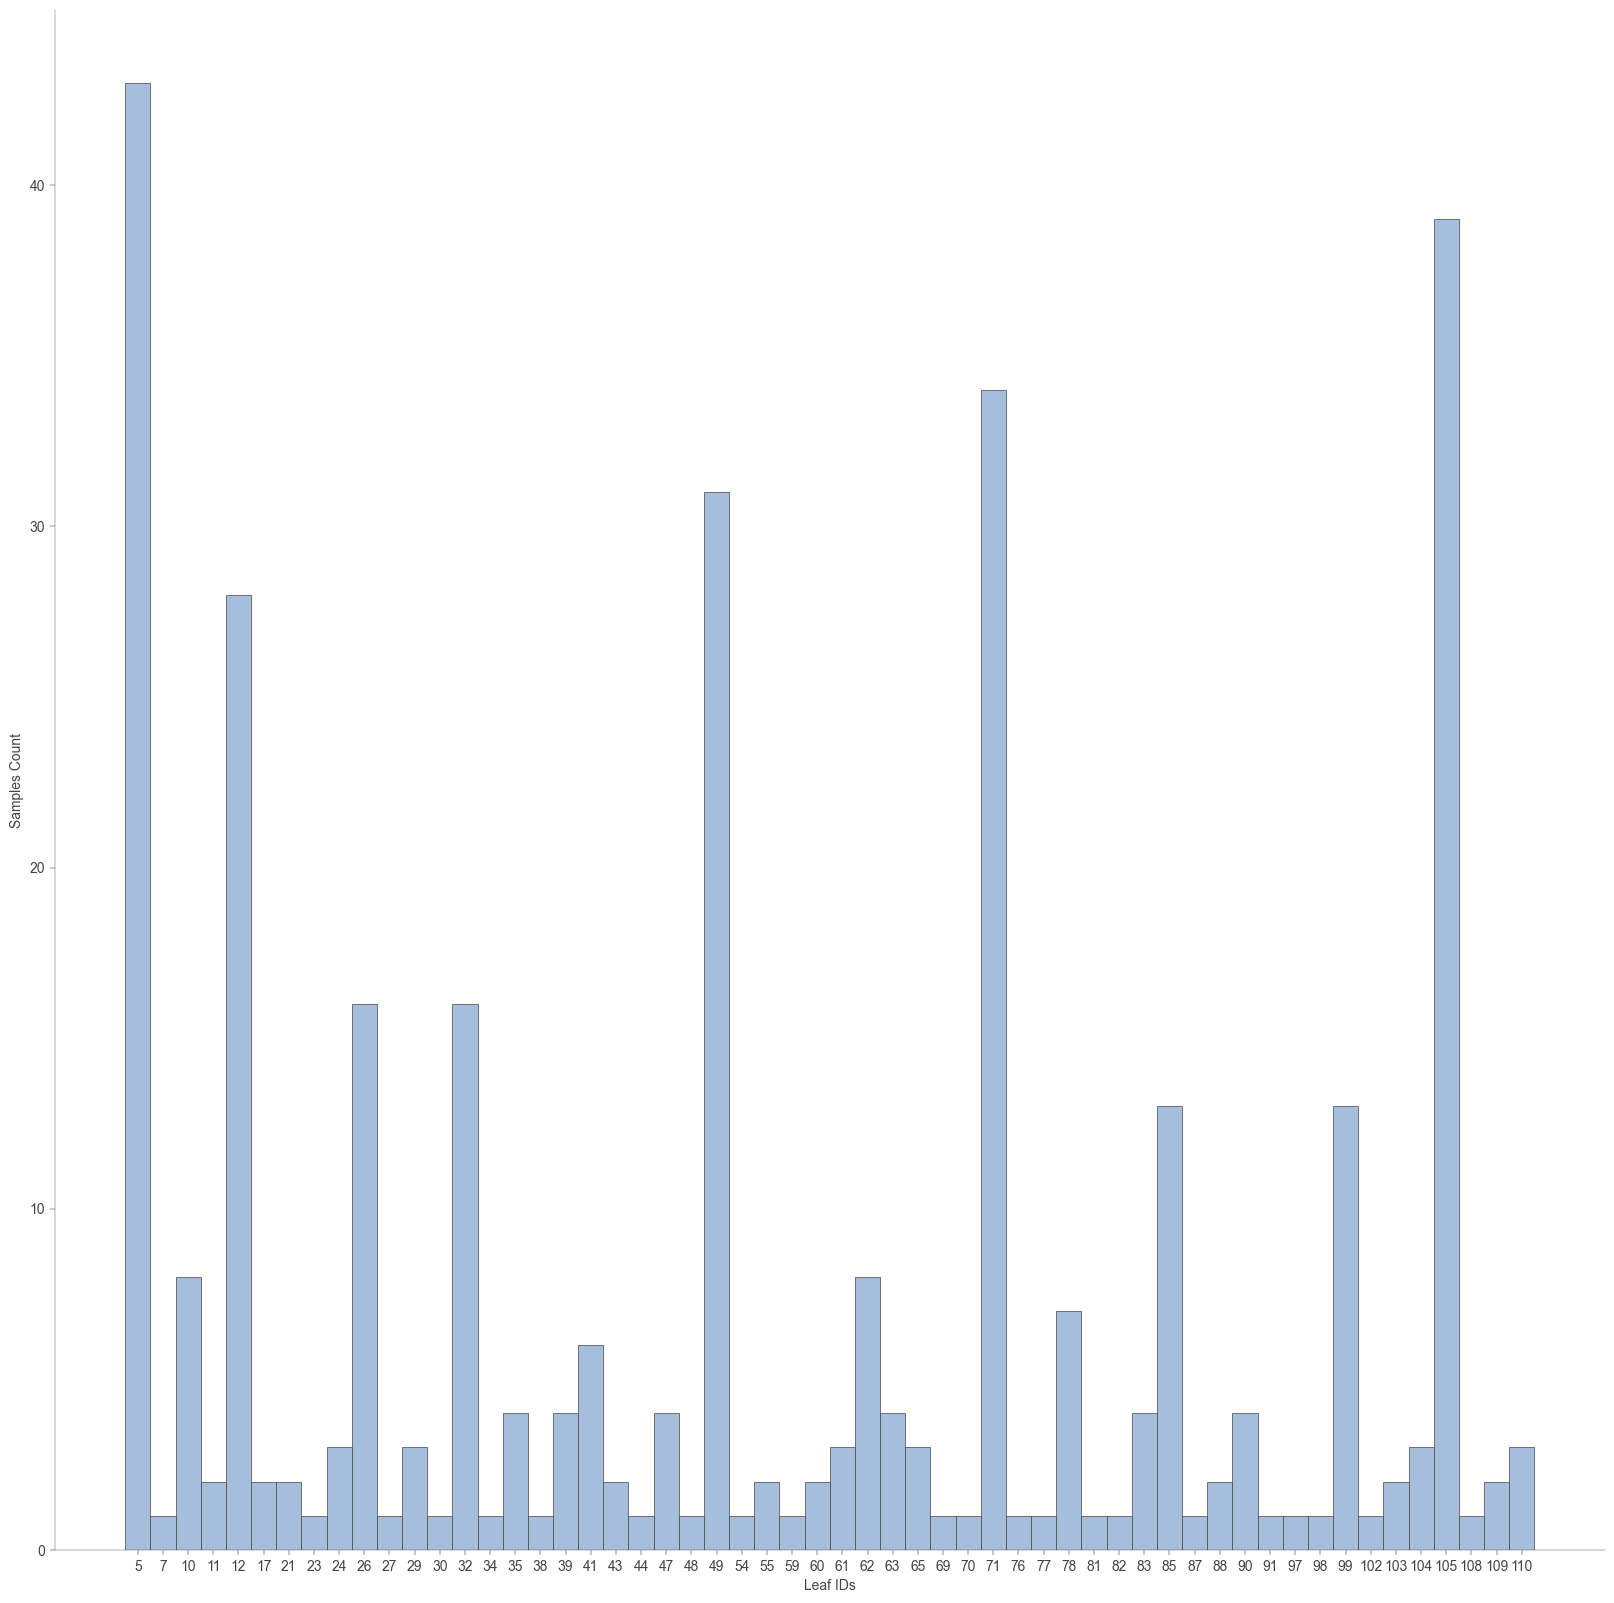

In [136]:
viz_model.leaf_sizes(figsize=(20,20))

This graph shows the leaf sizes of the tree, or the sizes of each of the final groups. There are a lot of groups with a sample size of just 1 or 2, which seems overfitted and hence not very accurate for predictions. To see if a better interpretation can be achieved, the tree has been replotted with a max depth of 4.

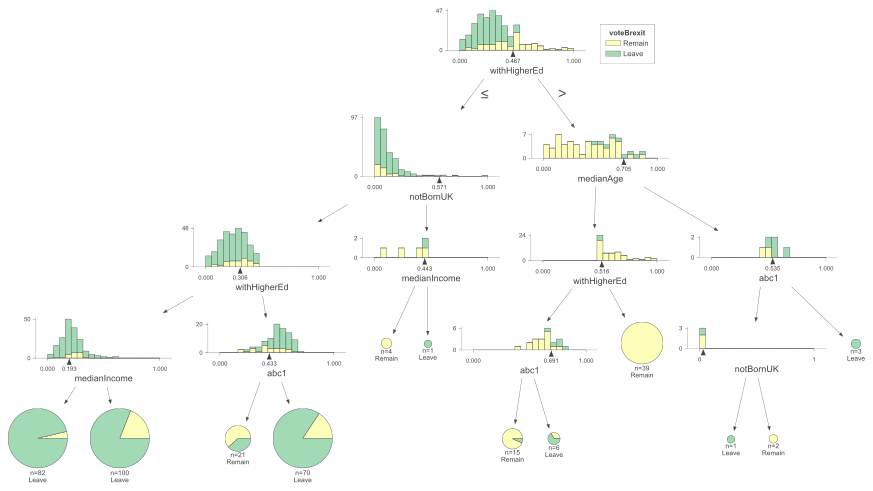

In [137]:
brexit_tree = DecisionTreeClassifier(criterion= 'gini', max_depth=4)
target = 'voteBrexit'
brexit_tree.fit(df[variables].values, df['voteBrexit'])
viz_model = dtreeviz.model(brexit_tree,
                           X_train=df[variables], y_train=df[target],
                           feature_names=variables,
                           target_name=target, class_names=["Remain", "Leave"])
viz_model.view(scale = 1)

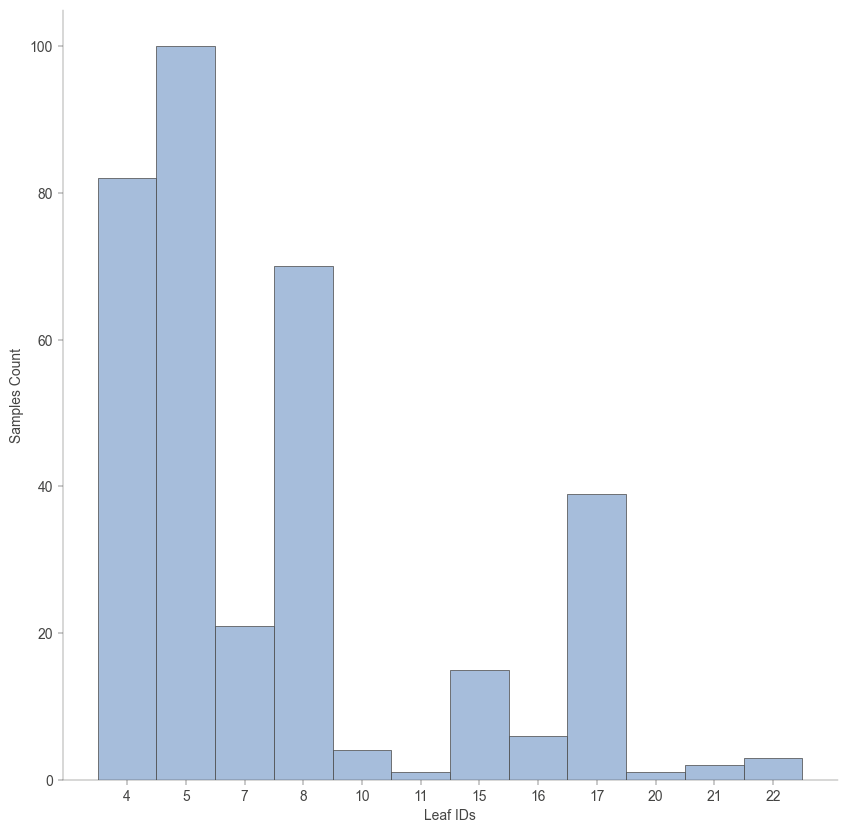

In [138]:
viz_model.leaf_sizes(figsize=(10,10))

The tree above is a little easier to interpret, you can see the importance of the first split, with the left hand side likely ending in a leave vote and vice versa. There is some impurity in the final classifications, however now if we have the inputs for an electoral ward, we can follow it's pathway down the tree and end up with a probability rather than an overfitted absolute prediction

### 5. Compare your decision tree model and your logistic regression model. Do they attribute high importance to the same factors? How do you intepret each model to explain the referendum vote? (1 mark)

As mentioned above both models attribute high importance to the withHigherEd factor, however with the decision tree it is harder to see the effects of the others, in some pathways a lot of factors are completely ignored. This is useful if, in this case, a ward has very high proportion of withHigherEd, it is almost certain they would vote remain and we do not have to worry about many other factors, however it is much harder to predict anyhting in the middle ground, and makes it harder to see the full picture. 

In the logistic regression model, we can see the full model with all factors minimises the AIC, and none of the 95% confidence intervals for each factor include 0, so they must each hold some value. It is also easier to compare the numeric weight of each factor as it is presented in the model summary. This makes it easier to interpret each factor separately to explain the vote and I think given all the inputs, this model is much better for prediction in this case.

### 6. Which model would you use if you were explaining the results for a newspaper article, and why? (1 mark)
If I were to explain the results to a newspaper article, I would use the logistic regression model. As mentioned above, it is easier to compare the different coefficients and their importance. However, this is a very nuanced topic, and I think a lot of detail is lost when analysing the data as an absolute leave or remain compared to the proportion of people that voted in each ward. For this reason I would follow a model similair to the Guardian, which would be to fit a linear regression for each coefficient separately, given the proportion of people that voted each way.